In [1]:
# ===============================================
# ===== Loading necessary libraries =============
# ===============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import roc_auc_score, brier_score_loss, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import joblib
from sklearn.tree import DecisionTreeClassifier, export_text

In [2]:
# ===============================================
# ===== Loading data into dataframe =============
# ===============================================

theData = pd.read_csv("HR-Employee-Attrition-oryginal.csv")

In [3]:
theData

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
# ===============================================
# =============== EDA ===========================
# ===============================================

# Check structure
print(theData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Numeric variables
numeric_vars = theData.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_vars)


['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [6]:
# Text variables
text_vars = theData.select_dtypes(exclude=[np.number]).columns.tolist()
print(text_vars)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [7]:
# Summary
print(theData.describe(include='all'))

                Age Attrition BusinessTravel    DailyRate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          NaN              6   
top     Research & Developm

In [8]:
# Missing values
print(theData.isna().any().any())

False


In [9]:
# Duplicates
print(theData.duplicated().sum())

0


In [10]:
# First 6 rows
print(theData.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [11]:
# ===============================================
# ===== Remove constant columns =================
# ===============================================
cols_to_remove = ["EmployeeCount", "Over18", "StandardHours"]
theData = theData.drop(columns=cols_to_remove, errors='ignore')

In [12]:
theData

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


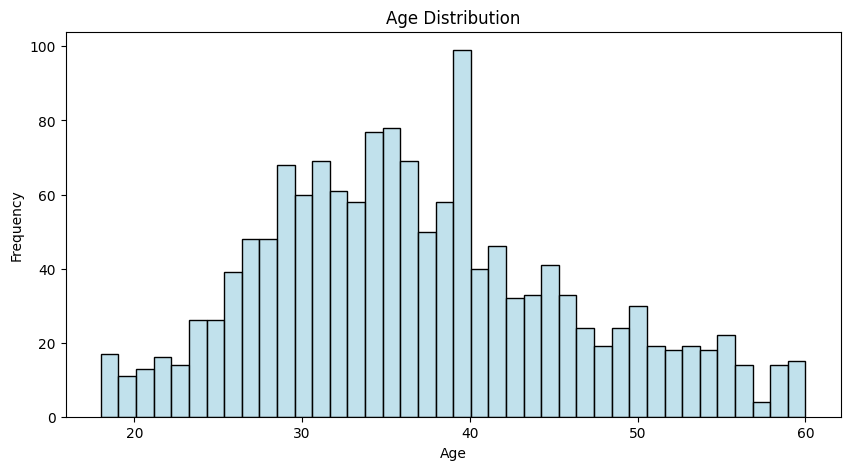

In [13]:
# ===============================================
# ============== Data visualizations ============
# ===============================================

# Age histogram
plt.figure(figsize=(10, 5))
sns.histplot(data=theData, x="Age", bins=40, color="lightblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

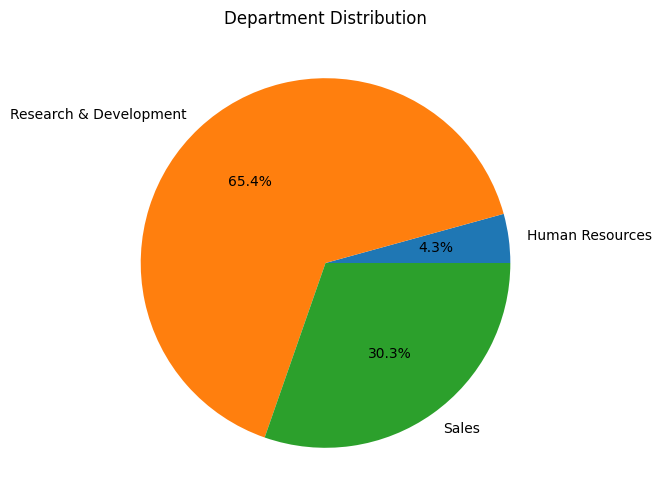

In [14]:

# Department distribution (pie chart)
department_counts = (
    theData.groupby("Department")
    .size()
    .reset_index(name="Count")
)
department_counts["Percent"] = round(
    100 * department_counts["Count"] / department_counts["Count"].sum(), 1
)

plt.figure(figsize=(6, 6))
plt.pie(department_counts["Count"],
        labels=department_counts["Department"],
        autopct='%1.1f%%')
plt.title("Department Distribution")
plt.show()

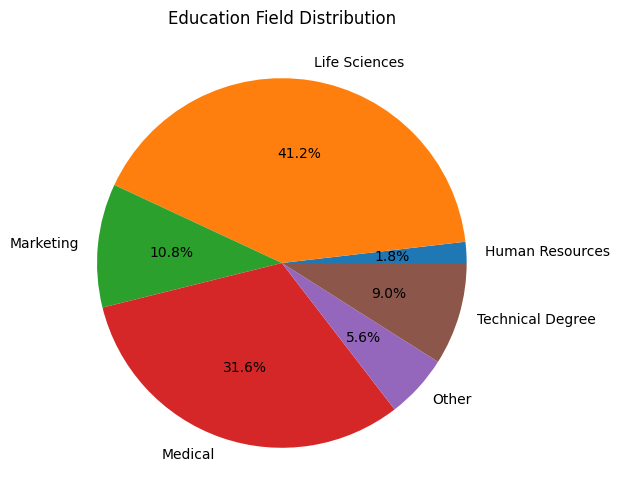

In [15]:
# Education field distribution
education_counts = (
    theData.groupby("EducationField")
    .size()
    .reset_index(name="Count")
)
education_counts["Percent"] = round(
    100 * education_counts["Count"] / education_counts["Count"].sum(), 1
)

plt.figure(figsize=(6, 6))
plt.pie(education_counts["Count"],
        labels=education_counts["EducationField"],
        autopct='%1.1f%%')
plt.title("Education Field Distribution")
plt.show()

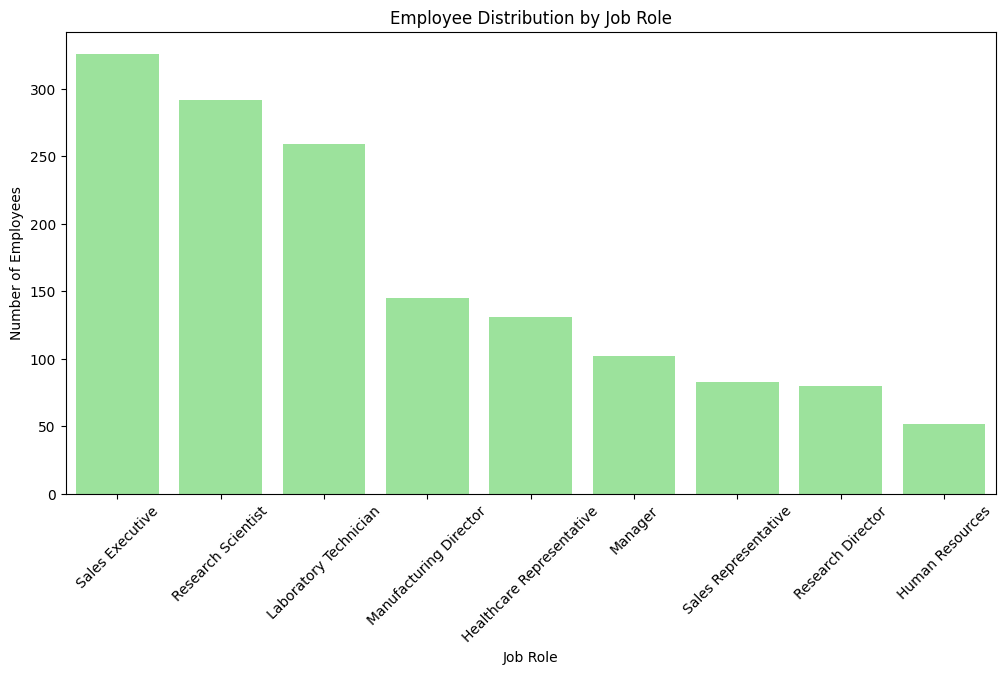

In [16]:
# Job role distribution
jobrole_counts = (
    theData.groupby("JobRole")
    .size()
    .reset_index(name="Count")
    .sort_values("Count", ascending=False)
)

plt.figure(figsize=(12, 6))
sns.barplot(data=jobrole_counts, x="JobRole", y="Count", color="lightgreen")
plt.xticks(rotation=45)
plt.title("Employee Distribution by Job Role")
plt.xlabel("Job Role")
plt.ylabel("Number of Employees")
plt.show()

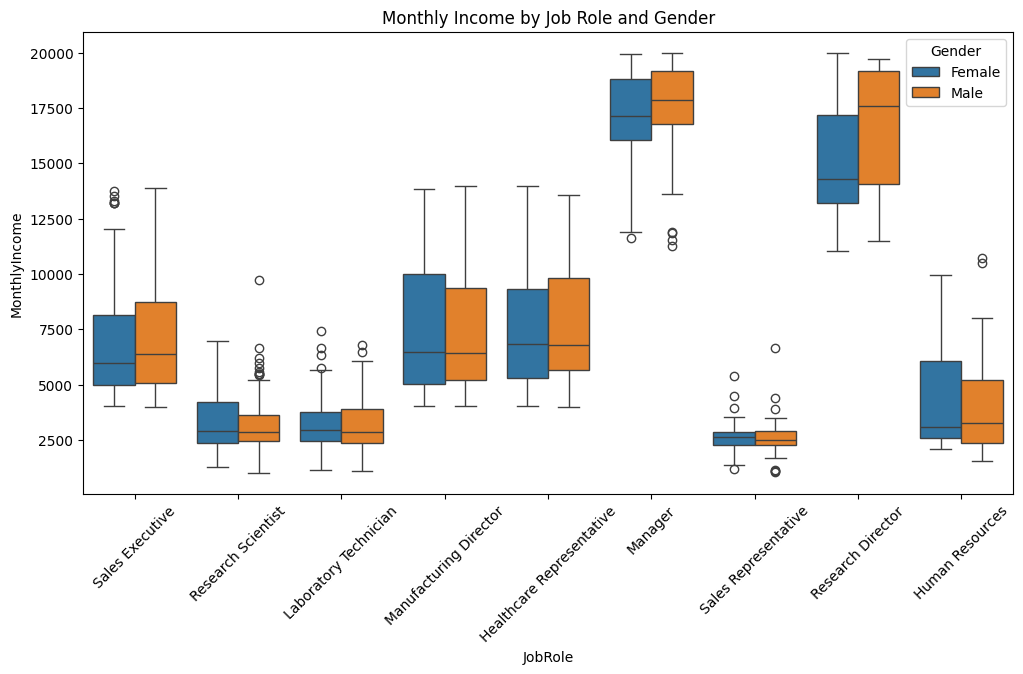

In [17]:
# Monthly income by job role and gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=theData, x="JobRole", y="MonthlyIncome", hue="Gender")
plt.xticks(rotation=45)
plt.title("Monthly Income by Job Role and Gender")
plt.show()

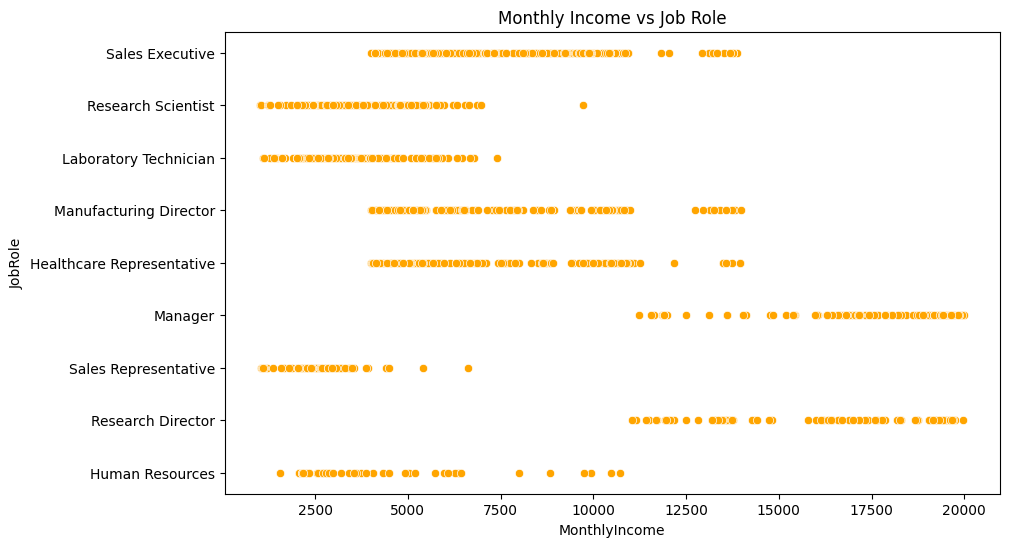

In [18]:
# Monthly income vs job role
plt.figure(figsize=(10, 6))
sns.scatterplot(data=theData, x="MonthlyIncome", y="JobRole", color="orange")
plt.title("Monthly Income vs Job Role")
plt.show()

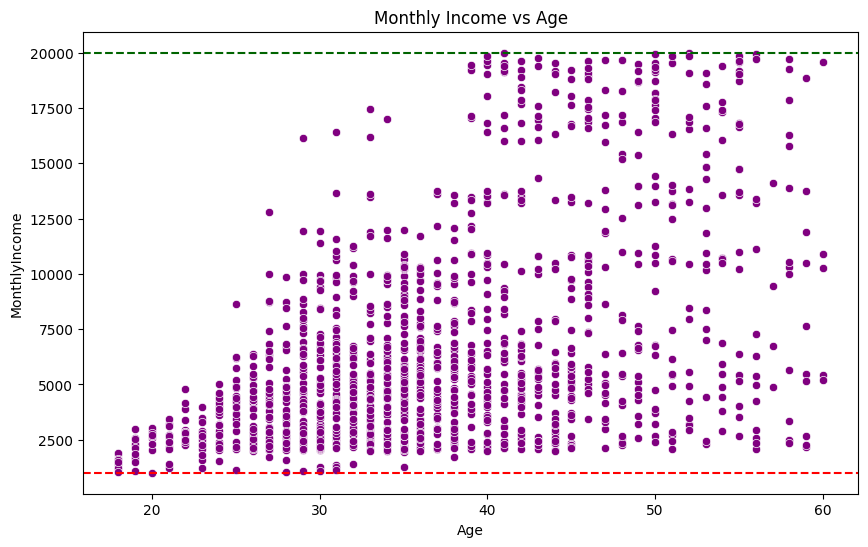

In [19]:
# Monthly income vs age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=theData, x="Age", y="MonthlyIncome", color="purple")
plt.axhline(y=theData["MonthlyIncome"].min(), color="red", linestyle="--")
plt.axhline(y=theData["MonthlyIncome"].max(), color="darkgreen", linestyle="--")
plt.title("Monthly Income vs Age")
plt.show()

In [20]:
def RegLogit_1var(df, yVar, xVars):
    """
    Univariate logistic regression for each predictor in xVars.
    Returns: R2, AUC (C), Dxy, Brier, coefficient, p-value.
    """

    results = []

    for x in xVars:
        formula = f"{yVar} ~ {x}"

        df_bin = df.copy()
        df_bin[yVar] = (df_bin[yVar] == "Yes").astype(int)

        try:
            model = smf.logit(formula=formula, data=df_bin).fit(disp=False)
        except Exception as e:
            print(f"Skipping {x} due to error in univariate logit: {e}")
            continue

        pred = model.predict(df_bin)
        y_true = df_bin[yVar]

        auc = roc_auc_score(y_true, pred)
        dxy = 2 * auc - 1
        brier = brier_score_loss(y_true, pred)
        r2 = model.prsquared

        coeff = model.params.iloc[1]
        pval = model.pvalues.iloc[1]

        results.append([x, r2, auc, dxy, brier, coeff, pval])

    result_df = pd.DataFrame(
        results,
        columns=["xVars", "R2", "C", "Dxy", "Brier", "coeff", "pvalue"]
    )

    
    return result_df.sort_values("R2", ascending=False)


print(theData.columns)

predictors = [c for c in theData.columns if c != "Attrition"]

result_reg1var = RegLogit_1var(theData, "Attrition", predictors)

reg_1var = result_reg1var[result_reg1var["pvalue"] < 0.05]

candidate_vars = reg_1var["xVars"].tolist()
print("Candidates from univariate logit (p < 0.05):", candidate_vars)


theData_screened = theData[["Attrition"] + candidate_vars].copy()

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Candidates from univariate logit (p < 0.05): ['JobRole', 'OverTime', 'TotalWorkingYears', 'JobLevel', 'MonthlyIncome', 'YearsInCurrentRole', 'YearsWithCurrManager', 'Age', 'YearsAtCompany', 'StockOptionLevel', 'JobInvolvement', 'BusinessTravel', 'JobSatisfaction', 'EnvironmentSatisfaction', 'DistanceFromHome', 'WorkLifeBalance', 'Training

In [21]:
reg_1var

,xVars,R2,C,Dxy,Brier,coeff,pvalue
13,JobRole,0.068466,0.675829,0.351659,0.127302,1.402824,3.279947e-03
19,OverTime,0.062685,0.650739,0.301477,0.127040,1.327406,1.351861e-19
24,TotalWorkingYears,0.038894,0.655853,0.311706,0.129648,-0.077731,1.690073e-10
12,JobLevel,0.037496,0.641609,0.283217,0.130441,-0.528977,2.912991e-10
16,MonthlyIncome,0.035028,0.655670,0.311340,0.130932,-0.000127,4.120115e-09
28,YearsInCurrentRole,0.032882,0.639951,0.279901,0.131087,-0.146278,1.606297e-09
30,YearsWithCurrManager,0.030700,0.636024,0.272048,0.131386,-0.141377,4.260562e-09
0,Age,0.030424,0.634321,0.268643,0.130677,-0.052250,1.913069e-09
27,YearsAtCompany,0.024706,0.648957,0.297915,0.131412,-0.080759,4.028630e-07
23,StockOptionLevel,0.023646,0.624904,0.249808,0.131763,-0.518331,2.315311e-07


In [22]:
theData

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [23]:
# ===============================================
# ========== Full logistic regression model =====
# ===============================================

def backward_stepwise_aic(df, target, predictors, verbose=True):
    """
    Backward stepwise logistic regression using AIC as criterion.
    Returns:
        final_vars: list of selected predictors
        history: DataFrame with AIC for each step
    """
    current_vars = predictors.copy()
    best_aic = None
    history = []

    while True:
        # Fit model with current variables
        formula = target + " ~ " + " + ".join(current_vars)
        try:
            model = smf.logit(formula=formula, data=df).fit(disp=False)
        except Exception as e:
            print(f"Error fitting full model with vars {current_vars}: {e}")
            break

        current_aic = model.aic

        if best_aic is None:
            best_aic = current_aic

        history.append({
            "n_vars": len(current_vars),
            "vars": current_vars.copy(),
            "AIC": current_aic,
        })

        if verbose:
            print(f"Current model ({len(current_vars)} vars) AIC = {current_aic:.2f}")

        # Try dropping each variable once
        improved = False
        best_candidate = None
        best_candidate_aic = current_aic

        for var in current_vars:
            trial_vars = [v for v in current_vars if v != var]
            if not trial_vars:
                continue

            trial_formula = target + " ~ " + " + ".join(trial_vars)
            try:
                trial_model = smf.logit(trial_formula, data=df).fit(disp=False)
            except Exception as e:
                if verbose:
                    print(f"  - Skipping drop {var} (error: {e})")
                continue

            trial_aic = trial_model.aic

            if verbose:
                print(f"  - Drop {var:25s} -> AIC = {trial_aic:.2f}")

            if trial_aic < best_candidate_aic - 1e-6:
                best_candidate_aic = trial_aic
                best_candidate = var
                improved = True

        if improved and best_candidate_aic < best_aic - 1e-6:
            if verbose:
                print(f"  => Removing {best_candidate}, AIC {current_aic:.2f} -> {best_candidate_aic:.2f}\n")
            current_vars.remove(best_candidate)
            best_aic = best_candidate_aic
        else:
            if verbose:
                print("No further AIC improvement. Stop.\n")
            break

    history_df = pd.DataFrame(history)
    return current_vars, history_df

In [ ]:
# Przygotowanie danych: dodajemy binarny target
theData_screened["Attrition_bin"] = (theData_screened["Attrition"] == "Yes").astype(int)

target = "Attrition_bin"
predictors_full = candidate_vars  

final_vars, aic_history = backward_stepwise_aic(
    df=theData_screened,
    target=target,
    predictors=predictors_full,
    verbose=True
)

print("Final vars from backward AIC selection:")
print(final_vars)

print("\nAIC history:")
print(aic_history)

# start: tylko Attrition + final_vars
theData_final = theData[["Attrition"] + final_vars].copy()

# jeśli CHCESZ dołożyć MonthlyIncome biznesowo:
if "MonthlyIncome" in theData.columns and "MonthlyIncome" not in theData_final.columns:
    theData_final["MonthlyIncome"] = theData["MonthlyIncome"]

theData = theData_final.copy()
print(theData.head())

Current model (18 vars) AIC = 991.19
  - Drop JobRole                   -> AIC = 1021.91
  - Drop OverTime                  -> AIC = 1091.10
  - Drop TotalWorkingYears         -> AIC = 990.20
  - Drop JobLevel                  -> AIC = 989.44
  - Drop MonthlyIncome             -> AIC = 989.76
  - Drop YearsInCurrentRole        -> AIC = 996.23
  - Drop YearsWithCurrManager      -> AIC = 995.11
  - Drop Age                       -> AIC = 992.79
  - Drop YearsAtCompany            -> AIC = 995.51
  - Drop StockOptionLevel          -> AIC = 1015.80
  - Drop JobInvolvement            -> AIC = 1011.73
  - Drop BusinessTravel            -> AIC = 1014.24
  - Drop JobSatisfaction           -> AIC = 1015.26
  - Drop EnvironmentSatisfaction   -> AIC = 1013.41
  - Drop DistanceFromHome          -> AIC = 1002.10
  - Drop WorkLifeBalance           -> AIC = 995.48
  - Drop TrainingTimesLastYear     -> AIC = 996.29
  - Drop DailyRate                 -> AIC = 992.28
  => Removing JobLevel, AIC 991.19 ->

In [25]:
# ===============================================
# ============= Create grouping variables =======
# ===============================================

# Age groups
theData.loc[:,"AgeGroup"] = pd.cut(
    theData["Age"],
    bins=[0, 18, 25, 35, 45, 55, 65, np.inf],
    labels=["0-18", "19-25", "26-35", "36-45", "46-55", "56-65", "65+"]
)

# Income groups
theData.loc[:, "IncomeGroup"] = pd.cut(
    theData["MonthlyIncome"],
    bins=[0, 2000, 4000, 6000, 8000, 10000, np.inf],
    labels=["0-2000", "2001-4000", "4001-6000", "6001-8000", "8001-10000", "10000+"]
)

# Years in current role groups
theData.loc[:, "CurrentRoleYearsGroup"] = pd.cut(
    theData["YearsInCurrentRole"],
    bins=[-np.inf, 4, 8, 12, 16, np.inf],
    labels=["0-4", "5-8", "9-12", "13-16", "17+"]
)

# Environment satisfaction labels
env_map = {
    1: "Dissatisfied",
    2: "Moderately satisfied",
    3: "Moderately satisfied",
    4: "Satisfied"
}

theData.loc[:, "EnvironmentSatisfaction"] = theData["EnvironmentSatisfaction"].map(env_map)

/var/folders/kf/fpf7cl4d74g_zpz2l3v784zr0000gn/T/ipykernel_20143/2719825598.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Moderately satisfied' 'Moderately satisfied' 'Satisfied' ...
 'Moderately satisfied' 'Satisfied' 'Moderately satisfied']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  theData.loc[:, "EnvironmentSatisfaction"] = theData["EnvironmentSatisfaction"].map(env_map)


In [26]:
theData_clean = theData.copy()

In [27]:
# Create binary target: 1 = "Yes", 0 = "No"
theData_clean["Attrition_bin"] = (theData_clean["Attrition"] == "Yes").astype(int)

In [28]:
# Define target and feature columns
target = "Attrition_bin"
feature_cols = [c for c in theData_clean.columns if c not in ["Attrition", "Attrition_bin"]]

In [29]:
# ============================================================
# 2. Split data into train and test sets
# ============================================================

X = theData_clean[feature_cols]
y = theData_clean[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [30]:
# ============================================================
# 3. Build preprocessing + Random Forest model pipeline
# ============================================================

# Separate numeric and categorical columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

# Preprocessing: One-Hot Encoding for categorical features, passthrough for numeric
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ]
)

# Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42
)

# Full pipeline: preprocessing + model
clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", rf_model)
])

In [31]:
# ============================================================
# 4. Train the model and evaluate AUC on test set
# ============================================================

clf.fit(X_train, y_train)

y_pred_proba = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)

print(f"AUC on test set: {auc:.3f}")

AUC on test set: 0.795


In [32]:
# ============================================================
# 5. Add ML-based attrition probability to theData_clean
# ============================================================

theData_clean["Attrition_Prob_ML"] = clf.predict_proba(X)[:, 1]

In [33]:
# ============================================================
# 6. Save the trained model for later use with TabPy
# ============================================================

joblib.dump(clf, "model_attrition_rf.pkl")
print("Saved model to model_attrition_rf.pkl")

Saved model to model_attrition_rf.pkl


In [34]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# ============================================================
# 1. Get the feature matrix used for the model (same as before)
# ============================================================

# We reuse feature_cols and X from the previous ML block
X = theData_clean[feature_cols]

# Use the same preprocessing step from the RF pipeline
preprocess = clf.named_steps["preprocess"]

# Transform original features into numeric matrix (OHE + numeric)
X_transformed = preprocess.transform(X)  # this is a NumPy array

In [35]:
# ============================================================
# 2. PCA: reduce to 2 principal components for visualization
# ============================================================

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_transformed)

# Add PC1 and PC2 to theData_clean
theData_clean["PC1"] = X_pca[:, 0]
theData_clean["PC2"] = X_pca[:, 1]

print("Explained variance by PC1 and PC2:",
      pca.explained_variance_ratio_)

Explained variance by PC1 and PC2: [0.99269984 0.00729177]


In [36]:
# ============================================================
# 3. KMeans clustering on the transformed feature space
# ============================================================

# Choose number of clusters (e.g., 3)
k = 3

kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
clusters = kmeans.fit_predict(X_transformed)

# Add cluster labels to theData_clean
theData_clean["Cluster_K3"] = clusters

# Optional: check basic cluster sizes
print(theData_clean["Cluster_K3"].value_counts())


Cluster_K3
0    916
2    365
1    189
Name: count, dtype: int64


In [37]:
theData_clean["RiskTier"] = pd.cut(
    theData_clean["Attrition_Prob_ML"],
    bins=[0, 0.2, 0.5, 1.0],
    labels=["Low", "Medium", "High"]
)

In [38]:
# ===============================================
# ===== Decision Tree rules - Attrition =========
# ===============================================

# Safety check
if "theData_clean" not in globals():
    raise ValueError("theData_clean not found. Run data preparation cells first.")

# ------------------------------------------------
# 1. Prepare target and features
# ------------------------------------------------

df_tree = theData_clean.copy()

# Binary target: 1 = Attrition "Yes", 0 = "No"
df_tree["Attrition_bin"] = (df_tree["Attrition"] == "Yes").astype(int)

# If you already have feature_cols from RF, reuse them.
# Otherwise, create them (exclude target and helper columns).
try:
    feature_cols_dt = feature_cols
except NameError:
    feature_cols_dt = [
        c for c in df_tree.columns
        if c not in ["Attrition", "Attrition_bin",
                     "Attrition_Prob_ML",  # RF output
                     "Attrition_Prob_Tree", "Tree_Segment"]  # just in case
    ]

X = df_tree[feature_cols_dt]
y = df_tree["Attrition_bin"]

# Split into numeric and categorical
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = [col for col in X.columns if col not in numeric_features]

# ------------------------------------------------
# 2. Preprocessing (OHE for categoricals)
#    Here we don't impute, assuming you cleaned data earlier.
#    If you have NaNs, you can add SimpleImputer like in your version.
# ------------------------------------------------

preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("numeric", "passthrough", numeric_features),
    ]
)

# ------------------------------------------------
# 3. Decision Tree model (shallow for readable rules)
# ------------------------------------------------

tree_clf = DecisionTreeClassifier(
    max_depth=4,         # controls complexity of rules
    min_samples_leaf=20, # avoids tiny leaves / overfitting
    random_state=42
)

tree_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", tree_clf),
])

# ------------------------------------------------
# 4. Train/test split and training
# ------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

tree_pipeline.fit(X_train, y_train)

# ------------------------------------------------
# 5. Evaluation: labels + probabilities for class 1 ("Left")
# ------------------------------------------------

y_pred = tree_pipeline.predict(X_test)
y_pred_proba = tree_pipeline.predict_proba(X_test)[:, 1]  # class 1 = Attrition Yes

print("Decision Tree - results (1 = Attrition Yes):")
print(classification_report(y_test, y_pred, target_names=["Stayed (0)", "Left (1)"]))
print(f"Decision Tree AUC: {roc_auc_score(y_test, y_pred_proba):.3f}")

# ------------------------------------------------
# 6. Export human-readable rules
# ------------------------------------------------

preprocessor_fitted = tree_pipeline.named_steps["preprocessor"]

feature_names = []

# Order must match ColumnTransformer: first categorical (OHE), then numeric
if categorical_features:
    encoder = preprocessor_fitted.named_transformers_["categorical"]
    cat_feature_names = encoder.get_feature_names_out(categorical_features).tolist()
    feature_names.extend(cat_feature_names)

if numeric_features:
    feature_names.extend(numeric_features)

tree_rules = export_text(
    tree_pipeline.named_steps["classifier"],
    feature_names=feature_names,
    decimals=3
)

print("Decision Tree rules (max_depth=4):")
print(tree_rules)

# ------------------------------------------------
# 7. Add tree-based predictions back to theData_clean
# ------------------------------------------------

# Predict probabilities for ALL rows (class 1 = Attrition Yes)
proba_all = tree_pipeline.predict_proba(X)[:, 1]

# Transform all X and get leaf indices (segments)
X_all_transformed = preprocessor_fitted.transform(X)
leaf_ids = tree_pipeline.named_steps["classifier"].apply(X_all_transformed)

theData_clean["Attrition_Prob_Tree"] = proba_all
theData_clean["Tree_Segment"] = leaf_ids

print("Tree-based probabilities and segments added to theData_clean.")

# ------------------------------------------------
# 8. Optional: check correlation with Random Forest probabilities
# ------------------------------------------------

if "Attrition_Prob_ML" in theData_clean.columns:
    corr = np.corrcoef(
        theData_clean["Attrition_Prob_ML"],
        theData_clean["Attrition_Prob_Tree"]
    )[0, 1]
    print(f"Correlation RF vs Tree probabilities: {corr:.3f}")


Decision Tree - results (1 = Attrition Yes):
              precision    recall  f1-score   support

  Stayed (0)       0.87      0.95      0.91       247
    Left (1)       0.48      0.23      0.31        47

    accuracy                           0.84       294
   macro avg       0.67      0.59      0.61       294
weighted avg       0.80      0.84      0.81       294

Decision Tree AUC: 0.738
Decision Tree rules (max_depth=4):
|--- YearsAtCompany <= 1.500
|   |--- Age <= 33.500
|   |   |--- OverTime_No <= 0.500
|   |   |   |--- class: 1
|   |   |--- OverTime_No >  0.500
|   |   |   |--- StockOptionLevel <= 0.500
|   |   |   |   |--- class: 1
|   |   |   |--- StockOptionLevel >  0.500
|   |   |   |   |--- class: 0
|   |--- Age >  33.500
|   |   |--- OverTime_Yes <= 0.500
|   |   |   |--- EnvironmentSatisfaction_Moderately satisfied <= 0.500
|   |   |   |   |--- class: 0
|   |   |   |--- EnvironmentSatisfaction_Moderately satisfied >  0.500
|   |   |   |   |--- class: 0
|   |   |--- Ove

In [39]:
theData_clean.to_csv(
    "HR-Employee-Attrition-ML-FINAL.csv",
    sep=";",
    index=False
)